### DCC - Sirius Education
#### Grupo: O-PY-THA-ON

#### Exploração inicial
Abaixo foram feitas explorações iniciais nos dois datasets escolhidos pelo grupo

* Produção Municipal Agrícola [(PAM)](https://sidra.ibge.gov.br/tabela/5457)
* Pesquisa de Orçamentos Familiares [(POF)](https://www.ibge.gov.br/estatisticas/sociais/saude/24786-pesquisa-de-orcamentos-familiares-2.html?=&t=resultados)

#### Imports

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

#### Exploração inicial da PAM



<a href="https://sidra.ibge.gov.br/tabela/5457">Tabela 5457 - Área plantada ou destinada à colheita, área colhida, quantidade produzida, rendimento médio e valor da produção das lavouras temporárias e permanente</a>

In [12]:
producao = pd.read_excel('C:\dcc-fellowship-ciencia-de-dados\Alimentos cesta básica_excel.xltx', index_col= 'Ano')

#### Verificando o shape do dataframe

In [13]:
producao.shape

(47, 12)

In [14]:
producao.head()

,Arroz (em casca),Banana (cacho),Batata-inglesa,Café (em grão) Total,Cana-de-açúcar,Feijão (em grão),Laranja,Mandioca,Milho (em grão),Soja (em grão),Tomate,Trigo (em grão)
Ano,,,,,,,,,,,,
1974,6764038,352761,1672498,3230618,95623685,2238012,29594708,24797636,16273227,7876527,1144037,2858530
1975,7781538,363684,1654767,2544596,91524559,2282466,31565854,26117614,16334516,9893008,1049724,1788180
1976,9757079,381763,1897518,751969,103173449,1840315,35841350,25443053,17751077,11227123,1166888,3215745
1977,8993696,427660,1896311,1950771,120081700,2290007,35823453,25929484,19255936,12513406,1297508,2066039
1978,7296142,416025,2013882,2535323,129144950,2193977,39131682,25459408,13569401,9540577,1464558,2690888


#### Análise de valores nulos

In [15]:
producao.isnull().sum()

Arroz (em casca)        0
Banana (cacho)          0
Batata-inglesa          0
Café (em grão) Total    0
Cana-de-açúcar          0
Feijão (em grão)        0
Laranja                 0
Mandioca                0
Milho (em grão)         0
Soja (em grão)          0
Tomate                  0
Trigo (em grão)         0
dtype: int64

#### Análise de valores duplicados

In [16]:
producao.duplicated().sum()

0

#### Centralidade, dispersão e boxplot para cada alimento da cesta básica

In [17]:
producao.describe()

,Arroz (em casca),Banana (cacho),Batata-inglesa,Café (em grão) Total,Cana-de-açúcar,Feijão (em grão),Laranja,Mandioca,Milho (em grão),Soja (em grão),Tomate,Trigo (em grão)
count,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01
mean,1.032623e+07,3.176821e+06,2.761729e+06,2.792463e+06,3.975459e+08,2.720224e+06,4.988128e+07,2.309252e+07,4.125725e+07,4.250427e+07,2.824883e+06,3.912155e+06
std,1.735005e+06,3.160505e+06,7.246213e+05,6.497791e+05,2.315308e+08,4.730048e+05,3.464153e+07,2.504254e+06,2.496821e+07,3.365850e+07,1.059247e+06,1.653151e+06
min,6.764038e+06,3.527610e+05,1.654767e+06,7.519690e+05,9.152456e+07,1.580546e+06,1.670790e+07,1.759319e+07,1.356940e+07,7.876527e+06,1.049724e+06,1.533871e+06
25%,9.025959e+06,4.888370e+05,2.154474e+06,2.500516e+06,2.418545e+08,2.300276e+06,1.793300e+07,2.176087e+07,2.159513e+07,1.534830e+07,1.890458e+06,2.473352e+06
50%,1.041903e+07,5.579800e+05,2.670493e+06,2.737660e+06,3.261210e+08,2.808639e+06,3.584135e+07,2.346448e+07,3.232100e+07,2.639264e+07,2.717965e+06,3.292777e+06
75%,1.162979e+07,6.753540e+06,3.549010e+06,3.050224e+06,6.684532e+08,3.051184e+06,8.139752e+07,2.496417e+07,5.373824e+07,5.884514e+07,3.810625e+06,5.640248e+06
max,1.347699e+07,7.329471e+06,3.917234e+06,4.405416e+06,7.685942e+08,3.486763e+06,1.152340e+08,2.670304e+07,1.039636e+08,1.217977e+08,4.416652e+06,6.834421e+06


#### Boxplots

In [18]:
px.box(producao, title = 'Análise da disperção', labels = {'value': 'Produção (Toneladas)', 'variable' : 'Culturas'} )


#### Avaliando o crescimento histórico das culturas

In [19]:
fig = px.scatter(producao,  title = 'Crescimento histórico das culturas', x = producao.index, y = producao.columns,  labels = {'value': 'Produção (Toneladas)', 'variable' : 'Culturas'} )
fig.update_layout(template = 'plotly_white')

In [20]:
fig = px.bar(producao, x = producao.index, y = producao.columns,  labels = {'value': 'Produção (Toneladas)', 'variable' : 'Culturas'})
fig.update_layout(template = 'plotly_white')
fig.update_traces(texttemplate = '%{y:.2s}', textposition = 'outside')


In [23]:
producao.head(2)

,Arroz (em casca),Banana (cacho),Batata-inglesa,Café (em grão) Total,Cana-de-açúcar,Feijão (em grão),Laranja,Mandioca,Milho (em grão),Soja (em grão),Tomate,Trigo (em grão)
Ano,,,,,,,,,,,,
1974,6764038,352761,1672498,3230618,95623685,2238012,29594708,24797636,16273227,7876527,1144037,2858530
1975,7781538,363684,1654767,2544596,91524559,2282466,31565854,26117614,16334516,9893008,1049724,1788180


In [29]:
fig = px.line(producao, x ='Ano',  y = colunas)

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Arroz (em casca)', 'Banana (cacho)', 'Batata-inglesa', 'Café (em grão) Total', 'Cana-de-açúcar', 'Feijão (em grão)', 'Laranja', 'Mandioca', 'Milho (em grão)', 'Soja (em grão)', 'Tomate', 'Trigo (em grão)'] but received: Ano

In [27]:
colunas = list(producao.columns)
colunas

['Arroz (em casca)',
 'Banana (cacho)',
 'Batata-inglesa',
 'Café (em grão) Total',
 'Cana-de-açúcar',
 'Feijão (em grão)',
 'Laranja',
 'Mandioca',
 'Milho (em grão)',
 'Soja (em grão)',
 'Tomate',
 'Trigo (em grão)']

#### Exploração inicial da POF

<a href="https://sidra.ibge.gov.br/tabela/8157/">Tabela 8157 - Aquisição alimentar domiciliar per capita anual por classes de rendimento total variação patrimonial mensal familiar e grupos, subgrupos e produtos</a>

In [ ]:
consumo = pd.read_excel('C:\dcc-fellowship-ciencia-de-dados\pof_rendimento_regiao_2.xlsx')

   #### Verificando o shape do dataframe 

In [ ]:
consumo.shape

(78, 9)

#### Legendas das classes de rendimento:
* Até 1.908 Reais: F
* Mais de 1.908 a 2.862 Reais: E
* Mais de 2.862 a 5.724 Reais: D
* Mais de 5.724 a 9.540 Reais: C
* Mais de 9.540 a 14.310 Reais: B
* Mais de 14.310 Reais: A

In [ ]:
consumo.head(10)

,Items,Região,Total,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
0,Arroz polido,Brasil,18.22,20.48,20.28,18.80,14.86,15.57,12.40
1,Arroz polido,Norte,17.94,17.84,19.64,16.94,18.65,16.49,15.87
2,Arroz polido,Nordeste,20.33,22.35,22.21,19.58,14.12,15.28,10.86
3,Arroz polido,Sudeste,17.05,18.96,16.81,18.67,14.60,16.76,13.00
4,Arroz polido,Sul,14.70,15.58,19.33,15.77,12.16,11.29,10.46
5,Arroz polido,Centro-Oeste,24.07,27.03,32.29,24.80,21.73,18.18,12.88
6,Feijão-mulatinho,Brasil,0.69,0.89,0.88,0.68,0.46,0.33,0.44
7,Feijão-mulatinho,Norte,0.48,0.54,0.56,0.52,0.24,0.06,0.23
8,Feijão-mulatinho,Nordeste,1.47,1.42,1.69,1.42,1.80,0.85,0.74
9,Feijão-mulatinho,Sudeste,0.37,0.35,0.33,0.45,0.19,0.30,0.58


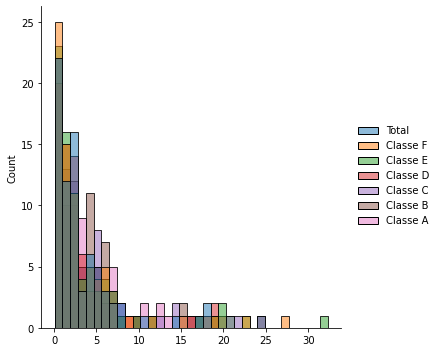

In [ ]:
sns.displot(consumo)

#### Items da cesta básica

In [ ]:
for i in list(consumo['Items'].unique()):
    print(i)

 Arroz polido
Feijão-mulatinho
Feijão-preto
Batata-inglesa
Banana-d'água
Laranja-pêra
Farinha de mandioca
Farinha de trigo
Fubá de milho
Açúcar cristal
Molho de tomate
Óleo de soja
Café moído


#### Agrupamento por items e região com relação ao total e as classes

In [ ]:
consumo_agrupado = consumo.groupby(['Items', 'Região']).mean()

In [ ]:
consumo_agrupado.head(20)

Total  Classe F  Classe E  Classe D  Classe C  \
Items          Região                                                        
 Arroz polido  Brasil        18.22     20.48     20.28     18.80     14.86   
               Centro-Oeste  24.07     27.03     32.29     24.80     21.73   
               Nordeste      20.33     22.35     22.21     19.58     14.12   
               Norte         17.94     17.84     19.64     16.94     18.65   
               Sudeste       17.05     18.96     16.81     18.67     14.60   
               Sul           14.70     15.58     19.33     15.77     12.16   
Açúcar cristal Brasil         6.05      6.27      6.68      6.64      5.62   
               Centro-Oeste   7.89      9.15      9.35      7.30      8.22   
               Nordeste       7.13      6.60      7.36      8.18      7.04   
               Norte          5.81      5.14      5.96      5.66      7.97   
               Sudeste        5.49      5.80      5.91      6.44      5.41   
               Sul            4.78      6.19      6.30      5.11      3.37   
Banana-d'água  Brasil         2.46      1.40      1.96      2.46      3.32   
               Centro-Oeste   2.21      1.85      1.58      1.78      2.47   
               Nordeste       0.48      0.44      0.53      0.51      0.49   
               Norte          0.59      0.40      0.80      0.49      1.01   
               Sudeste        3.30      2.50      2.73      2.98      3.93   
               Sul            5.00      4.69      4.79      4.98      4.84   
Batata-inglesa Brasil         4.02      2.62      3.46      4.13      5.03   
               Centro-Oeste   3.88      2.13      3.72      3.43      3.92   

                             Classe B  Classe A  
Items          Região                            
 Arroz polido  Brasil           15.57     12.40  
               Centro-Oeste     18.18     12.88  
               Nordeste         15.28     10.86  
               Norte            16.49     15.87  
               Sudeste          16.76     13.00  
               Sul              11.29     10.46  
Açúcar cristal Brasil            4.15      3.49  
               Centro-Oeste      5.85      6.77  
               Nordeste          5.20      5.23  
               Norte             5.92      7.44  
               Sudeste           3.50      2.21  
               Sul               4.03      2.82  
Banana-d'água  Brasil            3.84      4.03  
               Centro-Oeste      4.41      3.16  
               Nordeste          0.54      0.37  
               Norte             0.78      0.72  
               Sudeste           4.09      4.96  
               Sul               5.90      5.32  
Batata-inglesa Brasil            4.84      6.61  
               Centro-Oeste      4.31      7.49

#### Análise de valores nulos


In [ ]:
consumo.isnull().sum()

Items       0
Região      0
Total       0
Classe F    0
Classe E    0
Classe D    0
Classe C    0
Classe B    0
Classe A    0
dtype: int64

### Centralidade, dispersão e boxplot 


In [ ]:
consumo.describe()

,Total,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,3.835256,3.814103,4.078974,3.888077,3.676154,3.687949,3.638974
std,4.883045,5.405006,5.808285,4.987594,4.282917,4.058306,3.520732
min,0.290000,0.170000,0.180000,0.290000,0.120000,0.060000,0.080000
25%,0.870000,0.837500,0.885000,0.962500,0.915000,0.892500,0.892500
50%,2.290000,1.845000,1.930000,2.115000,2.340000,2.435000,2.540000
75%,4.550000,4.235000,4.627500,4.865000,4.792500,4.582500,5.297500
max,24.070000,27.030000,32.290000,24.800000,21.730000,18.180000,15.870000


#### Separando o dataframe por região


In [ ]:
consumo_nordeste = consumo.query("Região == 'Nordeste'")
consumo_centro_oeste = consumo.query("Região == 'Centro-Oeste'")
consumo_norte = consumo.query("Região == 'Norte'")
consumo_sul = consumo.query("Região == 'Sul'")
consumo_sudeste = consumo.query("Região == 'Sudeste'")
consumo_brasil = consumo.query("Região == 'Brasil'")

* Boxplots por região

In [ ]:
fig = px.box(consumo_nordeste, x = 'Items', y = 'Classe A')
fig.show()

#### Dentre os alimentos da cesta básica, qual o mais consumido por região?

* Região nordeste

In [ ]:
fig = px.bar(consumo_nordeste, y = 'Items', x = ['Classe A', 'Classe B', 'Classe C', 'Classe D', 'Classe E'], title = 'Consumo de alimetos por classe na regiao nordeste', labels= {'Items': 'Alimentos', 'value': 'Consumo anual per capita (kg)' })
fig.show()

* Região Norte

In [ ]:
fig = px.bar(consumo_norte, y = 'Items', x = ['Classe A', 'Classe B', 'Classe C', 'Classe D', 'Classe E'], title = 'Consumo de alimetos por classe na regiao norte', labels= {'Items': 'Alimentos', 'value': 'Consumo anual per capita (kg)' })
fig.show()

* Região Centro-Oeste

In [ ]:
fig = px.bar(consumo_norte, y = 'Items', x = ['Classe A', 'Classe B', 'Classe C', 'Classe D', 'Classe E'], title = 'Consumo de alimetos por classe na regiao centro-oeste', labels= {'Items': 'Alimentos', 'value': 'Consumo anual per capita (kg)' })
fig.show()

* Região Sul 

In [ ]:
fig = px.bar(consumo_sul, y = 'Items', x = ['Classe A', 'Classe B', 'Classe C', 'Classe D', 'Classe E'], title = 'Consumo de alimetos por classe na regiao sul', labels= {'Items': 'Alimentos', 'value': 'Consumo anual per capita (kg)' })
fig.show()


* Região Sudeste

In [ ]:
fig = px.bar(consumo_sudeste, y = 'Items', x = ['Classe A', 'Classe B', 'Classe C', 'Classe D', 'Classe E'], title = 'Consumo de alimetos por classe na regiao sudeste', labels= {'Items': 'Alimentos', 'value': 'Consumo anual per capita (kg)' })
fig.show()


* Brasil

In [ ]:
fig = px.bar(consumo_brasil, y = 'Items', x = ['Classe A', 'Classe B', 'Classe C', 'Classe D', 'Classe E'], title = 'Consumo de alimetos por classe na regiao Brasil', labels= {'Items': 'Alimentos', 'value': 'Consumo anual per capita (kg)' })
fig.show()